# Implementing linear optics

In [1]:
import numpy as np
from discopy import optics
from discopy.optics import Id, MZI, PhaseShift, BeamSplitter

Build an optical network using beam splitters, phase shifters and Mach-Zender interferometers.

Build a simple optical network:


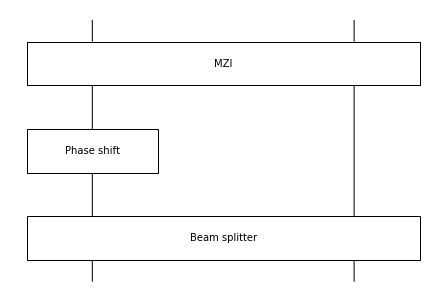

In [2]:
print("Build a simple optical network:")

network = MZI(0.3, 0.4) >> PhaseShift(0.8) @ Id(1) >>  BeamSplitter(0.4)

network.draw(draw_type_labels=False)

In [3]:
print("Compute the amplitude with 3 photons, input [1, 2] and output [2, 1]:")
amplitude = network.amp(3, [1, 2], [2, 1])
print(amplitude)
 
print("\nCompute the output distribution with input [1, 2]")
probs = []
for i in range(4):
    amplitude = network.amp(3, [1, 2], [i, 3 - i])
    prob = np.absolute(amplitude) ** 2
    print([i, 3 - i], prob)
    probs += [prob]
assert np.allclose(sum(probs), 1.)

Compute the amplitude with 3 photons, input [1, 2] and output [2, 1]:
(-0.29209762512832627+0.020714057607149807j)

Compute the output distribution with input [1, 2]
[0, 3] 0.06585350977536815
[1, 2] 0.84684633542349
[2, 1] 0.08575009478816055
[3, 0] 0.0015500600129819025


We now build the Vienna chip of https://www.nature.com/articles/s41534-019-0179-2

In [4]:
def build_chip(params):   
    chip = Id(26)
    for i in range(11):
        boxes = Id()
        for j in range(3 + i):
            boxes = boxes @ MZI(*params[i, j])
        chip = chip >> Id(10 - i) @ boxes @ Id(10 - i)
    return chip

Initialise the chip with random parameters


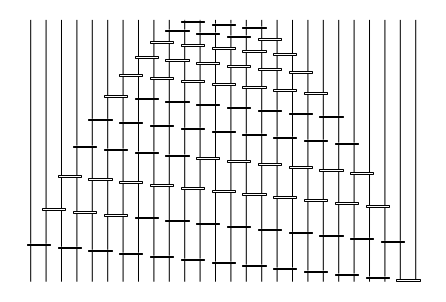

In [5]:
print("Initialise the chip with random parameters")
params = np.random.rand(11, 13, 2)
chip = build_chip(params)
chip.draw(draw_type_labels=False, draw_box_labels=False)

In [6]:
n_photons = 4
x = [0 for i in range(10)] + [0, 0, 1, 3, 0, 0] + [0 for i in range(10)] # input occupation numbers
y = [0 for i in range(10)] + [0, 1, 0, 2, 1, 0] + [0 for i in range(10)] # output occupation numbers

amplitude = chip.amp(n_photons, x, y)

print("Calculate the amplitude of an input-output pair with 4 photons:")
print(amplitude)

Calculate the amplitude of an input-output pair with 4 photons:
(-0.001627706164648192+0.0010816131856901997j)


We can also use thewalrus for the computation of the permanent

In [7]:
import thewalrus
from thewalrus import perm

chip.amp(n_photons, x, y, permanent=perm)

(-0.0016277061646481916+0.001081613185690199j)